> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

> Here I am trying to analyze an IMDB movie database in order to predict various trends involved in popularity of the movies based on Genre, Revenue, Cast etc. 
> Also, I will try to evaluate how different parameters are correlated to one another.

#### Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading the movie data file

In [2]:
movie_df=pd.read_csv('tmdb-movies.csv')

#Displaying first 5 rows
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### *The revenue_adj and budget_adj columns show the revenue and budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.*

#### Check for the structure of data

In [3]:
movie_df.shape

(10866, 21)

#### There are 10866 rows and 21 columns in the given database

In [4]:
#Summary statistics

movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Check for data types and null values

In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Data Wrangling

> Here I will be performing all necessary steps for cleaning the data (eg: remove corrupt and redundant data, remove missing values, correct data types etc) to make the data more accurate for further analysis.

#### Droping columns that I won't be using in my analysis

In [7]:
movie_df.drop(['id' , 'runtime' , 'original_title' , 'homepage' , 'tagline' , 'overview' ,'keywords'],axis=1,inplace=True)

In [8]:
#Data after columns dropped
movie_df.head()

,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
cast                    10790 non-null object
director                10822 non-null object
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


#### Checking for null values in director column in order to remove NaN values

In [10]:
movie_df[movie_df.director.isnull()]

,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,tt4073952,0.126594,0,0,Iliza Shlesinger,NaN,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,NaN,0.108072,0,0,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,tt3908634,0.100910,0,0,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,tt3591568,0.291253,0,0,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,tt3711030,0.269468,0,0,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,tt3203290,0.119891,150000,0,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,Documentary,Valve,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,tt3024964,0.135376,0,0,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,tt4217172,0.038364,0,0,Jeremy Clarkson|Richard Hammond,NaN,Documentary,2 Entertain Video,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,tt1127205,0.256703,0,0,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,tt1532957,0.091395,3250000,0,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


In [11]:
#Checking for null values

movie_df[movie_df.cast.isnull()]

,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,tt4661600,0.422901,0,0,NaN,Sanjay Patel,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000e+00,0.000000e+00
441,tt4908644,0.220751,0,0,NaN,Evgeny Afineevsky,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000e+00,0.000000e+00
465,tt4393514,0.201696,0,0,NaN,Adam Curtis,Documentary,BBC,1/24/15,19,7.8,2015,0.000000e+00,0.000000e+00
536,tt3762974,0.122543,0,0,NaN,David Gelb,Documentary,NaN,10/8/15,12,8.0,2015,0.000000e+00,0.000000e+00
538,tt3983674,0.114264,0,0,NaN,Jennifer Siebel Newsom,Documentary,NaN,1/1/15,11,8.9,2015,0.000000e+00,0.000000e+00
587,tt4185572,0.062536,0,0,NaN,Kirby Dick,Documentary,NaN,2/27/15,39,7.8,2015,0.000000e+00,0.000000e+00
600,tt4550996,0.047256,0,0,NaN,Paul Johnson,Science Fiction|Action|Animation,NaN,3/24/15,29,7.6,2015,0.000000e+00,0.000000e+00
620,tt5022680,0.129696,0,0,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.000000e+00,0.000000e+00
1088,tt2714900,0.226028,0,1503616,NaN,John Maloof|Charlie Siskel,Documentary,NaN,3/28/14,70,7.8,2014,0.000000e+00,1.384967e+06
1173,tt3576038,0.159037,0,0,NaN,Ian Cheney,Documentary,NaN,4/20/14,14,6.9,2014,0.000000e+00,0.000000e+00


In [12]:
#Checking for null values

movie_df[movie_df.genres.isnull()]

,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,tt4835298,0.244648,0,0,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,tt5022680,0.129696,0,0,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,NaN,0.330431,0,0,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,tt1073510,0.302095,0,0,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,tt1229827,0.020701,0,0,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,tt1525359,0.081892,0,0,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,tt1672218,0.068411,0,0,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,tt0270053,0.130018,0,0,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,tt1720044,0.145331,0,0,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,tt2305700,0.520520,0,0,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [13]:
movie_df.dropna()

,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,tt1663202,9.110700,135000000,532950503,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,tt1340138,8.654359,155000000,440603537,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,tt3659388,7.667400,108000000,595380321,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,tt2293640,7.404165,74000000,1156730962,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,tt2096673,6.326804,175000000,853708609,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


#### Dropping null values from cast,director,genres,production_companies and imdb_id columns

In [14]:
drop_null=['cast','director','genres','production_companies','imdb_id']
movie_df.dropna(subset=drop_null, how='any', inplace=True)

#### Check whether null values are removed or not

In [15]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 14 columns):
imdb_id                 9771 non-null object
popularity              9771 non-null float64
budget                  9771 non-null int64
revenue                 9771 non-null int64
cast                    9771 non-null object
director                9771 non-null object
genres                  9771 non-null object
production_companies    9771 non-null object
release_date            9771 non-null object
vote_count              9771 non-null int64
vote_average            9771 non-null float64
release_year            9771 non-null int64
budget_adj              9771 non-null float64
revenue_adj             9771 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.1+ MB


#### Replace zero values with null values in the budget and revenue column.

In [16]:
movie_df['budget'] = movie_df['budget'].replace(0, np.NaN)
movie_df['revenue'] = movie_df['revenue'].replace(0, np.NaN)

#### Checking for duplicates

In [17]:
sum(movie_df.duplicated())

1

#### To drop the above duplicate value

In [18]:
movie_df.drop_duplicates(inplace=True)

#### Verify if duplicates are removed

In [19]:
sum(movie_df.duplicated())

0

#### Changing data type of release_date from object to datetime

In [20]:
movie_df['release_date']=pd.to_datetime(movie_df['release_date'])

#### Checking if data type changed

In [21]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 14 columns):
imdb_id                 9770 non-null object
popularity              9770 non-null float64
budget                  5021 non-null float64
revenue                 4750 non-null float64
cast                    9770 non-null object
director                9770 non-null object
genres                  9770 non-null object
production_companies    9770 non-null object
release_date            9770 non-null datetime64[ns]
vote_count              9770 non-null int64
vote_average            9770 non-null float64
release_year            9770 non-null int64
budget_adj              9770 non-null float64
revenue_adj             9770 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
memory usage: 1.1+ MB


## Exploratory Data Analysis

> In this section, I will be posing few relevant questions for the imdb movie dataset and then provide proper conclusions using different data visualisation techniques.

### Research Question 1

#### *What is the correlation between between popularity and the revenue genrated from the movies?*

#### Scatter plot between Popularity and revenue generated

<Figure size 1080x1080 with 0 Axes>

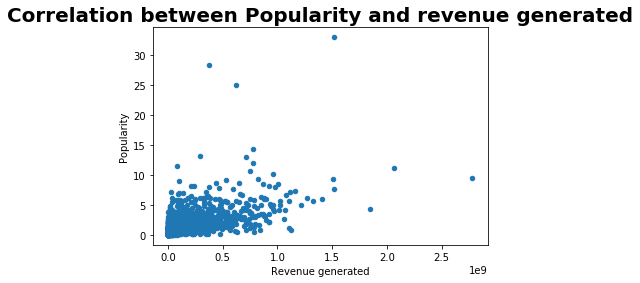

In [22]:
plt.figure(figsize=(15,15))
movie_df.plot(x='revenue', y='popularity', kind='scatter')
plt.title ('Correlation between Popularity and revenue generated', fontsize=20, fontweight='bold')
plt.xlabel('Revenue generated')
plt.ylabel('Popularity')
plt.show()


#### *Observation: The plot shows positive correlation between the two variables, which implies if one variable increases the other will increase too and if one varibale decreases the other will decrease too.*


### Research Question 2

#### *What kinds of properties are associated with movies having higher popularity?*

In [23]:
movie_df.describe().budget

count    5.021000e+03
mean     3.148929e+07
std      3.920818e+07
min      1.000000e+00
25%      6.300000e+06
50%      1.800000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

#### Create quartiles for different budget levels

In [24]:
# quartile function for creating different budget levels
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

In [25]:
# Using cut_into_quantile function to build a budget level column
movie_df = cut_into_quantile(movie_df,'budget')
movie_df

,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_levels
0,tt0369610,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,High
1,tt1392190,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,High
2,tt2908446,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,High
3,tt2488496,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,High
4,tt2820852,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,High
5,tt1663202,9.110700,135000000.0,5.329505e+08,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,High
6,tt1340138,8.654359,155000000.0,4.406035e+08,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,High
7,tt3659388,7.667400,108000000.0,5.953803e+08,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,High
8,tt2293640,7.404165,74000000.0,1.156731e+09,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,High
9,tt2096673,6.326804,175000000.0,8.537086e+08,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,High


#### Finding mean with respect to popularity if each budget level

In [26]:
b_mean = movie_df.groupby('budget_levels')['popularity'].mean()
b_mean

budget_levels
Low                0.531916
Medium             0.757254
Moderately High    0.989479
High               1.821742
Name: popularity, dtype: float64

#### Finding median with respect to popularity if each budget level

In [27]:
b_median = movie_df.groupby('budget_levels')['popularity'].median()
b_median

budget_levels
Low                0.386979
Medium             0.524253
Moderately High    0.742466
High               1.232098
Name: popularity, dtype: float64

#### Plotting bar graph to see variation of Popularity against budget levels

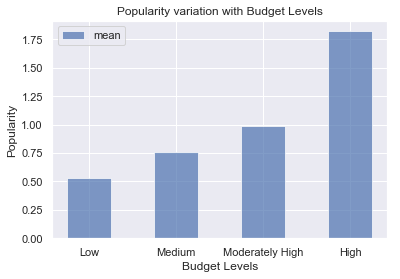

In [68]:
sns.set(style='darkgrid')
bars = plt.bar(loc,b_mean, width, color='b', alpha=.7, label='mean')

# title and labels
plt.ylabel('Popularity')
plt.xlabel('Budget Levels')
plt.title('Popularity variation with Budget Levels')
locations = loc
labels = b_median.index  
plt.xticks(locations, labels)

plt.legend()

#### *Observation: Here, I have chosen to compare it against budget levels. The plot shows that movies with higher popularity have higher budgets.*

### Research Question 3

#### *What kinds of properties are associated with movies having higher vote average?*

In [69]:
movie_df['revenue'].describe()

count    4.750000e+03
mean     9.099524e+07
std      1.632905e+08
min      2.000000e+00
25%      8.501551e+06
50%      3.331677e+07
75%      1.015876e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [31]:
movie_df=cut_into_quantile(movie_df,'revenue')

In [32]:
movie_df.head()

,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_levels,revenue_levels
0,tt0369610,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,High,High
1,tt1392190,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,High,High
2,tt2908446,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,High,High
3,tt2488496,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,High,High
4,tt2820852,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,High,High


#### Finding mean with respect to vote_average of each revenue level

In [33]:
r_mean = movie_df.groupby('revenue_levels')['vote_average'].mean()
r_mean

revenue_levels
Low                6.031481
Medium             6.029655
Moderately High    6.164785
High               6.377104
Name: vote_average, dtype: float64

#### Finding median with respect to vote_average of each revenue level

In [34]:
r_median = movie_df.groupby('revenue_levels')['vote_average'].median()
r_median

revenue_levels
Low                6.1
Medium             6.1
Moderately High    6.2
High               6.4
Name: vote_average, dtype: float64

#### Plotting a pie chart to see variation of Vote average against revenue levels

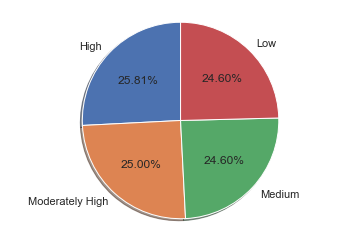

In [55]:
labels = 'High', 'Moderately High','Medium','Low'
sizes = [6.4,6.2,6.1,6.1]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

#### *Observation: Here, I have chosen to compare it against revenue levels. The plot shows that there is no significant difference in average vote at different revenue levels. So from the result, one can infer that high revenue generation from a movie does not necessarily imply it to be a good movie.*

### Research Question 4

#### *What are the movie trends with respect to revenue collected and movie count year after year?*

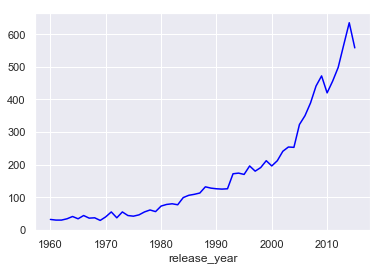

In [63]:
movies_df_gross = movie_df.groupby(['release_year'])['imdb_id'].count()
movies_df_gross.plot(color='blue')

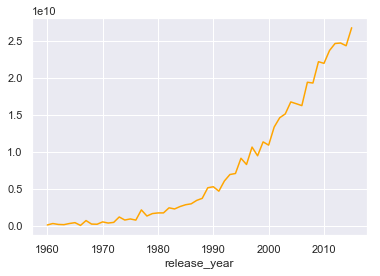

In [67]:
movies_df_gross = movie_df.groupby(['release_year'])['revenue'].sum()
movies_df_gross.plot(x='Release year', y='Revenue', color='orange')


#### *Observation: Movie trends show that both revenue and movie count have been increasing with every passing year.*

<a id='limitations'></a>
## Limitations

> I am listing below few of the limitations that I have come across during the course of this project:
>> *1. Many redundant columns found which does not hold much relevance to any decent question that can be posted.* <br>
>> *2. Missing data found across various columns.* <br>
>> *3. Inorder to pose some good questions like who is the most famous director or actor, enough data is not provided.*

<a id='conclusions'></a>
## Conclusions

> I have completed my analysis of IMDB movie dataset:
>> *1. I explored few general statistics regarding correlation among different variables. How the increase/decrease in one impacts the same in the other.For eg: More the popularity of a movie, more is the revenue generated.* <br>
>> *2. I then looked into properties that impact the popularity of a movie. Here, I depicted an example with budget levels from which we could conclude that higher popularity comes with higher budget.* <br>
>> *3. Also, I explored another example where I compared revenue generation with vote average. Here, the observation was that a good revenue generation does not necessarily imply a successful movie.*


In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0